In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('gender_labels.csv')


image_paths = data['file_path'].values
labels = data['label'].values

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)


train_paths, val_paths, train_labels, val_labels = train_test_split(image_paths, labels, test_size=0.2, random_state=42)


def load_and_preprocess_image(image_path, augment=False):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224]) 
    image = image / 255.0  
    
    if augment:
        image = tf.image.random_flip_left_right(image)
        image = tf.image.random_brightness(image, max_delta=0.2)
        image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
        image = tf.image.random_saturation(image, lower=0.8, upper=1.2)
        image = tf.image.random_hue(image, max_delta=0.02)
        
    return image


def create_dataset(paths, labels, is_train=False):
    path_ds = tf.data.Dataset.from_tensor_slices(paths)
    image_ds = path_ds.map(lambda path: load_and_preprocess_image(path, augment=is_train), num_parallel_calls=tf.data.AUTOTUNE)
    label_ds = tf.data.Dataset.from_tensor_slices(labels)
    return tf.data.Dataset.zip((image_ds, label_ds))

train_dataset = create_dataset(train_paths, train_labels, is_train=True).batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = create_dataset(val_paths, val_labels).batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)


In [2]:

from tensorflow.keras.models import load_model

loaded_model = load_model('gender_classification_model_vgg16.keras')


val_loss, val_acc = loaded_model.evaluate(val_dataset)
print(f'Validation accuracy of loaded model: {val_acc:.2f}')




13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9273 - loss: 0.2178
Validation accuracy of loaded model: 0.92


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Predicted class: Male


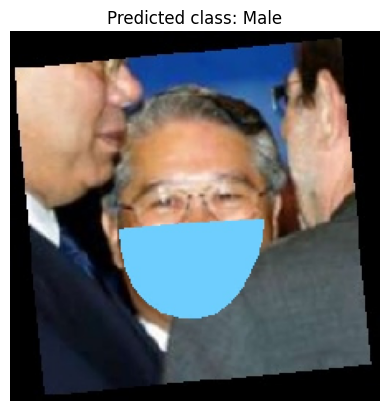

In [4]:

def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))  # Ensure the target size matches the input shape
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.vgg16.preprocess_input(img_array)
    return img_array


import random
random_index = random.randint(0, len(image_paths) - 1)
new_image_path = image_paths[random_index]


preprocessed_img = preprocess_image(new_image_path)


prediction = loaded_model.predict(preprocessed_img)
predicted_class = 'Female' if prediction[0] < 0.5 else 'Male'

print(f"Predicted class: {predicted_class}")


img = image.load_img(new_image_path, target_size=(224, 224))
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class}")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


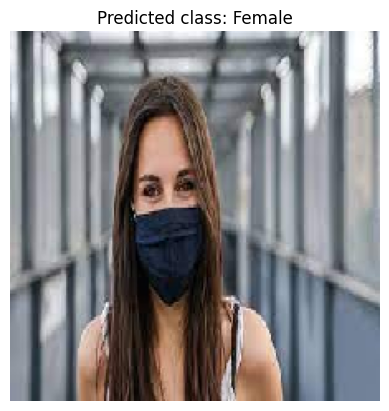

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


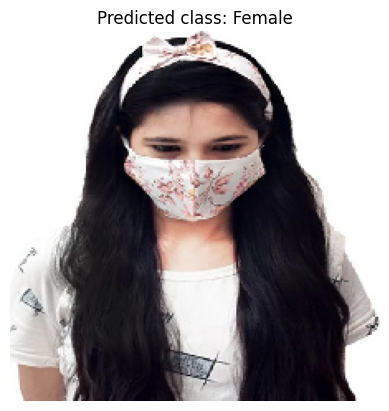

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


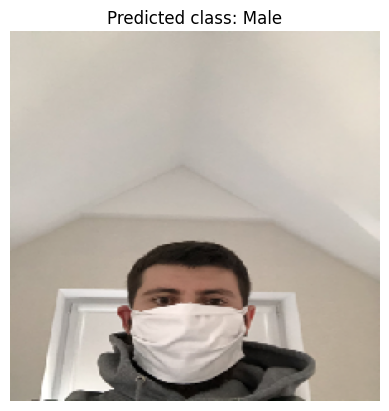

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


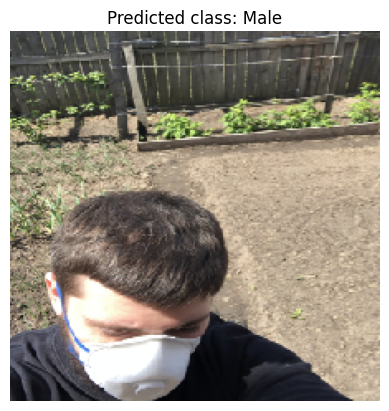

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


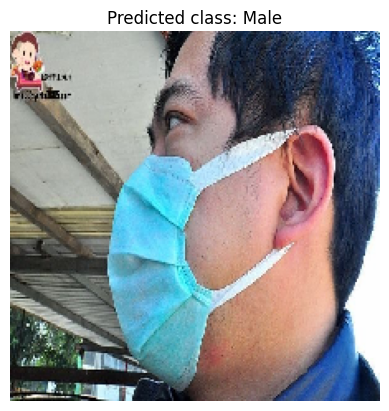

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


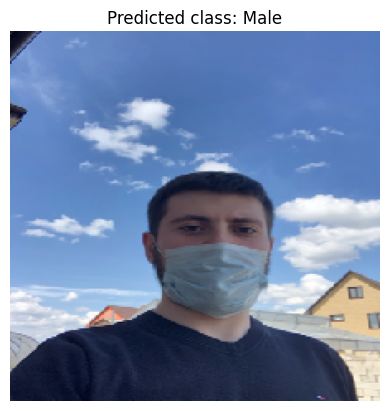

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


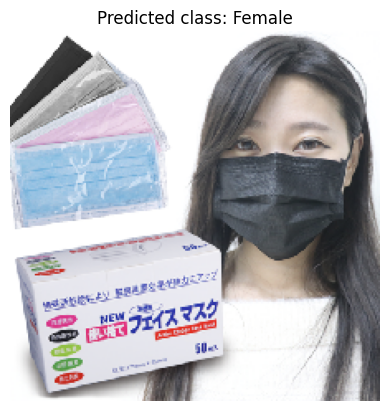

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


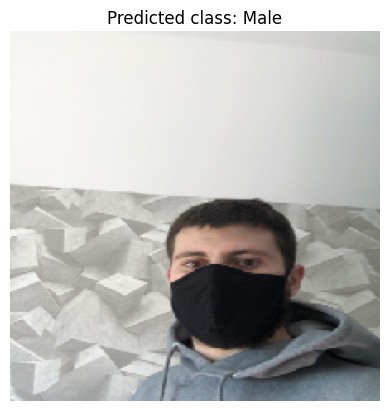

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


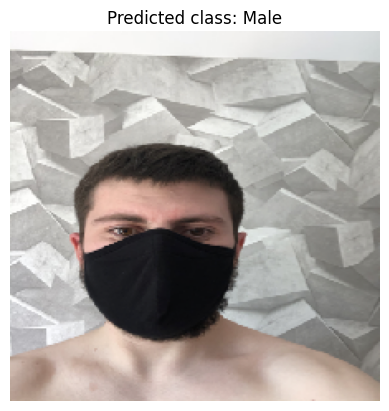

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


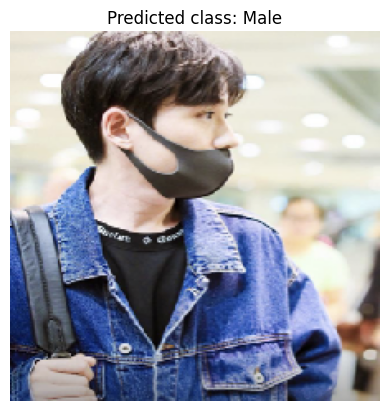

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


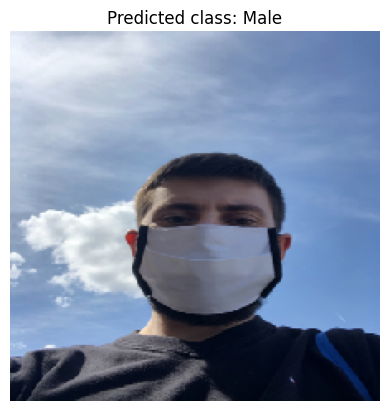

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


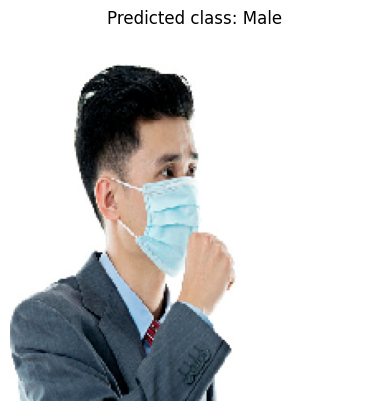

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


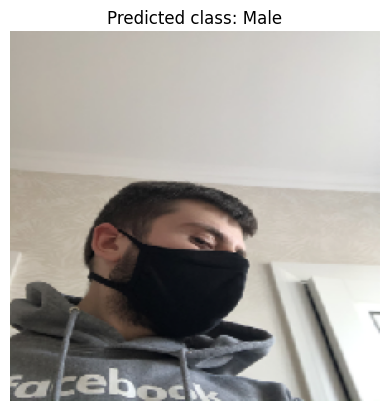

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


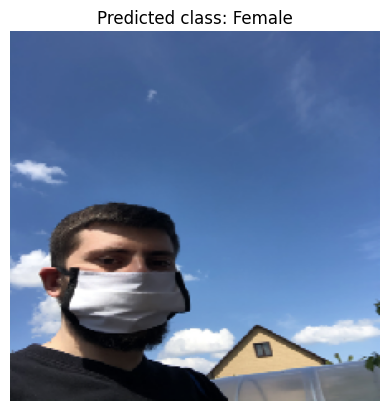

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


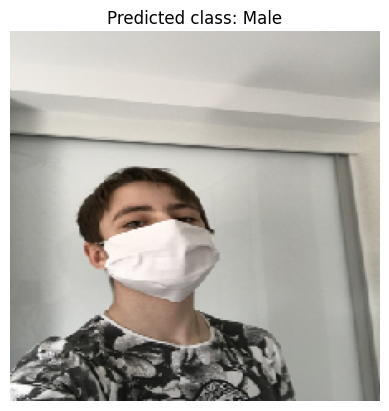

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


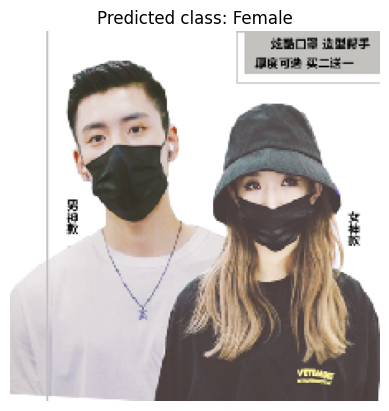

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


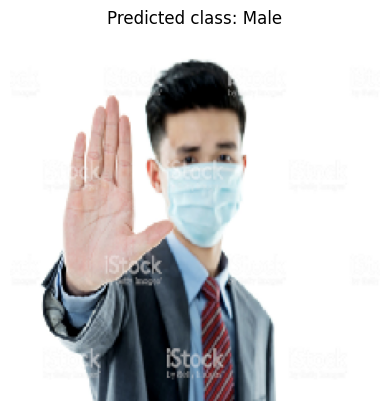

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


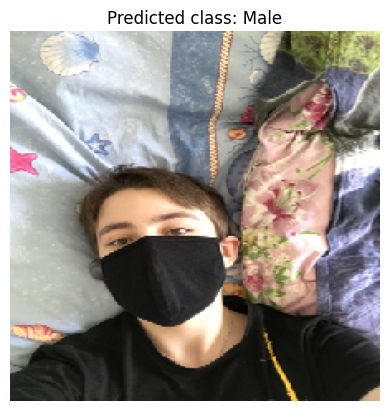

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


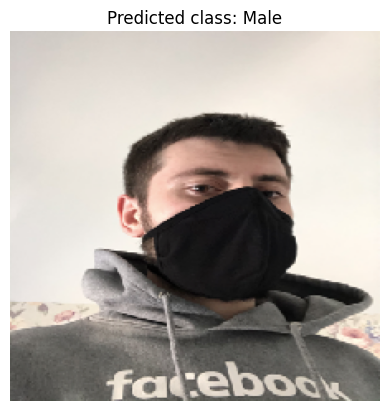

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


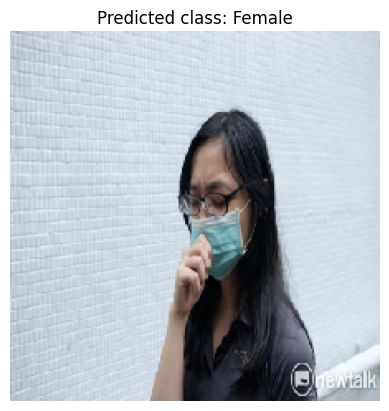

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


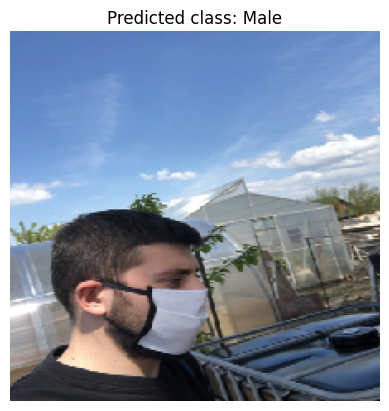

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


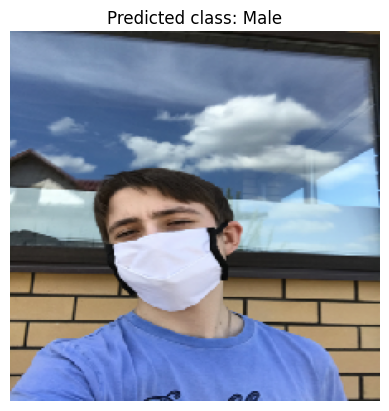

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


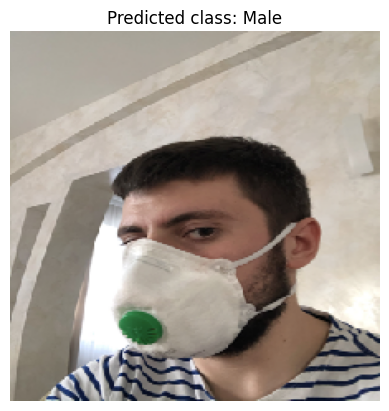

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


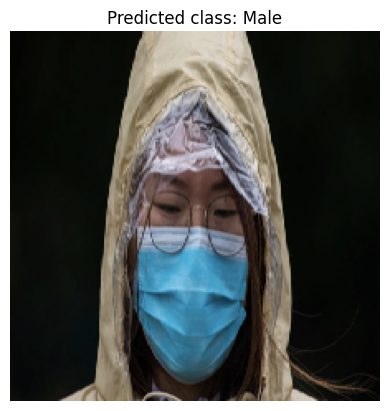

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


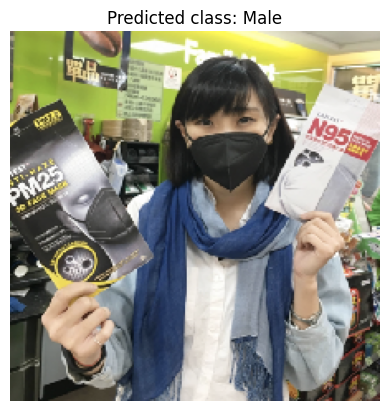

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


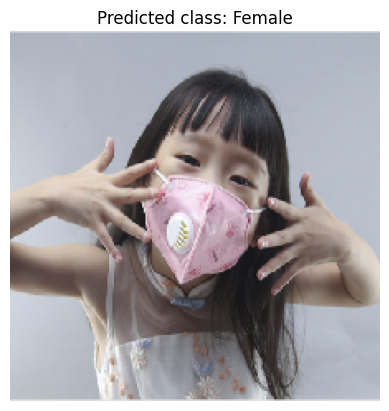

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


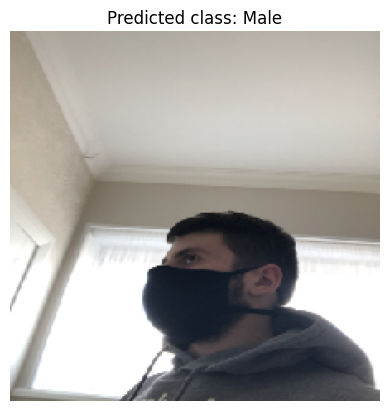

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


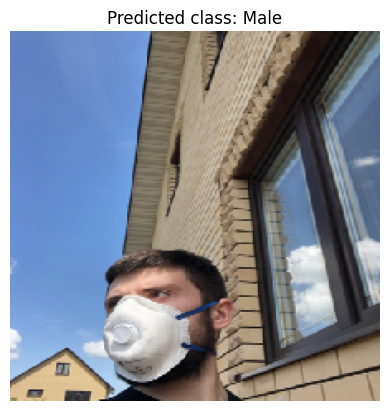

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


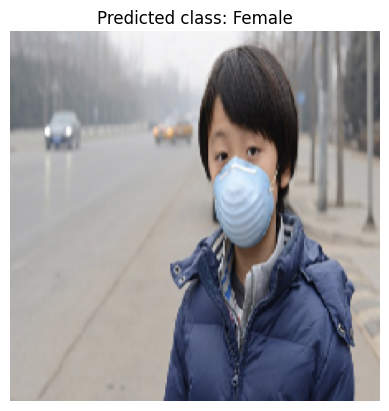

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


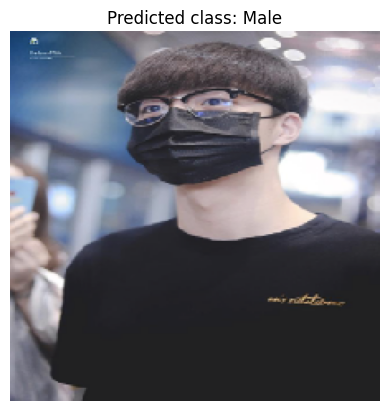

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


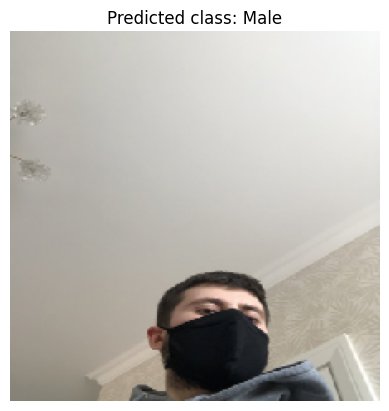

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


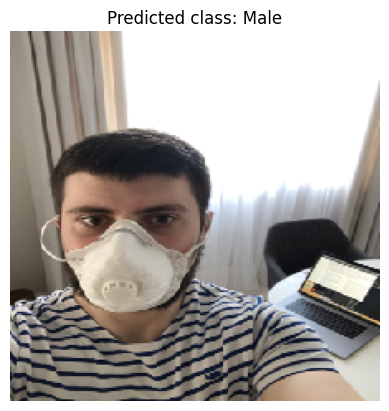

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


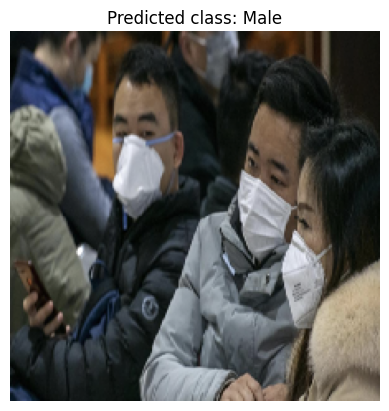

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


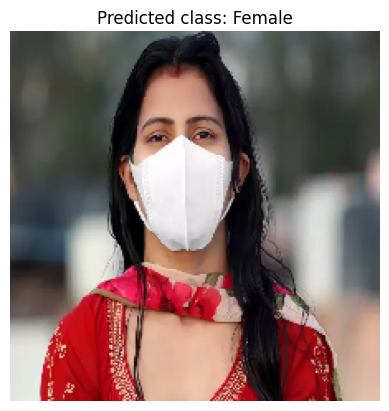

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


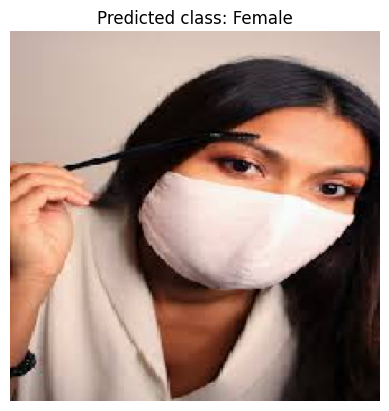

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


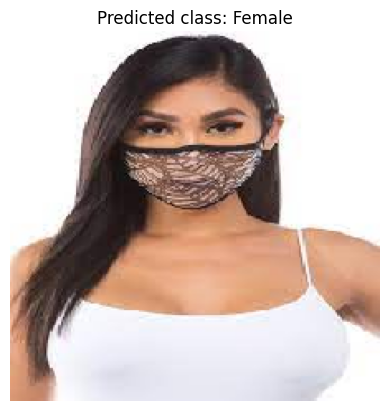

In [7]:
import os
def predict_and_display_images(base_path, model):
    for img_name in os.listdir(base_path):
        img_path = os.path.join(base_path, img_name)
        preprocessed_img = preprocess_image(img_path)
        prediction = model.predict(preprocessed_img)
        original_img=image.load_img(img_path, target_size=(224, 224))
        predicted_class = 'Female' if prediction[0] < 0.5 else 'Male'
        plt.imshow(original_img)
        plt.title(f"Predicted class: {predicted_class}")
        plt.axis('off')  
        plt.show()

# Use the function on a folder of images
base_path = 'random test'  # Enter the path of the folder containing testing images
predict_and_display_images(base_path, loaded_model)
## The below images are the that I downloaded from Internet to test the model